script to train VBL-VA001

In [4]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

load data hasil ekstraksi fitur fft

In [5]:
import pandas as pd

path = r'D:\Kuliah\SMT 6\Pembelajaran Mesin\VBL-VA001-master\data\feature_VBL-VA001.csv'
x = pd.read_csv(path, header=None)

load label

In [6]:
import pandas as pd

path = r'D:\Kuliah\SMT 6\Pembelajaran Mesin\VBL-VA001-master\data\label_VBL-VA001.csv'
y = pd.read_csv(path, header=None)

make 1D array to avoid warning

In [7]:
y = pd.Series.ravel(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=True
)

In [9]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (15604, 27)
Shape of Test Data : (3901, 27)


kNN Machine Learning<br>
import KNeighborsClassifier

Setup arrays to store training and test accuracies<br>
SVM Machine Learning<br>
Setup arrays to store training and test accuracies

In [10]:
var_gnb = [10.0 ** i for i in np.arange(-1, -100, -1)]
train_accuracy = np.empty(len(var_gnb))
test_accuracy = np.empty(len(var_gnb))

In [11]:
for i, k in enumerate(var_gnb):
    # Setup a Gaussian Naive Bayes Classifier
    model = GaussianNB(var_smoothing=k)
    gnb = model.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i] = gnb.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i] = gnb.score(X_test, y_test)

print max acccuracy

In [12]:
print(f"Max test acc: {np.max(test_accuracy)}")

Max test acc: 0.7272494232248141


Generate plot<br>
plt.title('Varying var_smoothing in GNB')

Text(0, 0.5, 'Accuracy')

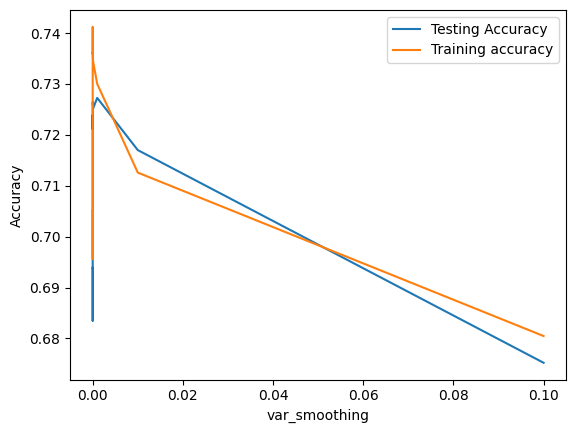

In [13]:
plt.plot(var_gnb, test_accuracy, label='Testing Accuracy')
plt.plot(var_gnb, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
# np.savetxt('gnb_var.txt', test_accuracy)
# plt.savefig('acc_GNB.pdf')
# plt.show()

print optimal var_gnb and max test accuracy

In [14]:
print(f"Optimal var_gnb: {np.argmax(test_accuracy)}")
print(f"Max test accuracy: {max(test_accuracy)}")

Optimal var_gnb: 2
Max test accuracy: 0.7272494232248141


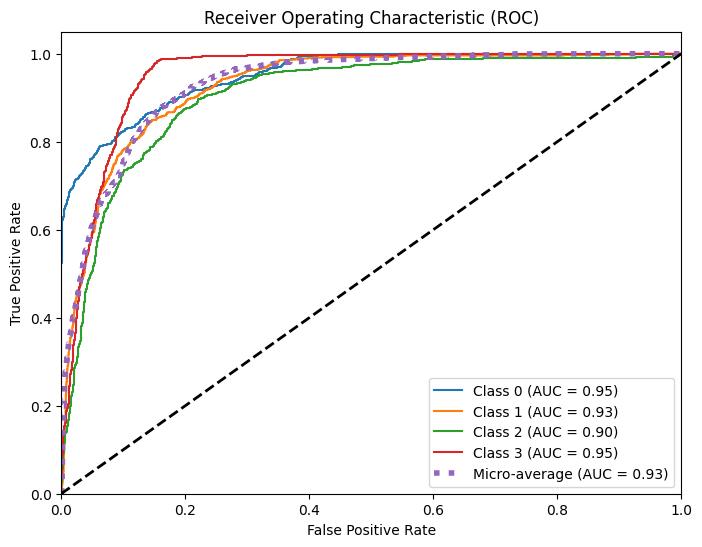

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Mengubah label menjadi format biner
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Menghitung skor jarak ke setiap kelas
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_prob = gnb.predict_proba(X_test)

# Menghitung kurva ROC dan AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

# Menghitung kurva ROC dan AUC untuk micro-average
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc_micro = roc_auc_score(y_test_bin, y_prob, average='micro')

# Menggambar kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr_micro, tpr_micro, label='Micro-average (AUC = {0:.2f})'.format(roc_auc_micro), linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediksi pada data uji
y_pred = gnb.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Menghitung presisi (menggunakan metode macro)
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: ", precision)

# Menghitung recall (menggunakan metode macro)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall: ", recall)

# Menghitung F1-score (menggunakan metode macro)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score: ", f1)

Accuracy:  0.723404255319149
Precision:  0.7382770221581776
Recall:  0.7276728530146717
F1-score:  0.7200973375817791
